## Imports

In [134]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [61]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

plt.rcParams["figure.figsize"] = (20, 10)

## Load the data

In [62]:
df = pd.read_json('data/events.log', lines=True)

In [63]:
SIZE_MAP = {
    "s": 1,
    "m": 2,
    "l": 3,
    "xl": 4
}

In [64]:
df['size_int'] = df['size'].map(SIZE_MAP)

In [65]:
df.head()

,user_id,event,price,size,size_int
0,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,690,l,3
1,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,779,xl,4
2,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,529,xl,4
3,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,719,l,3
4,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,841,l,3


### Single example

In [66]:
df.query('user_id == "73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92bbd4ed4c77872ee075"')

,user_id,event,price,size,size_int
0,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,690,l,3
1,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,779,xl,4
2,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,529,xl,4
3,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,719,l,3
4,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,841,l,3
5,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,834,l,3
6,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,623,l,3
7,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,887,l,3
8,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,680,xl,4
9,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,825,l,3


In [68]:
df.query('user_id == "e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a022b3180f9c923401d12"')

,user_id,event,price,size,size_int
31684,e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a02...,product_view,761,xl,4
31685,e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a02...,product_view,759,l,3
31686,e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a02...,product_view,626,m,2
31687,e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a02...,product_view,696,l,3
31688,e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a02...,product_view,721,xl,4
31689,e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a02...,product_view,698,l,3
31690,e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a02...,product_view,892,m,2
31691,e68d17097f9f8cccb700521cc70b2ae98bc871ddf58a02...,purchase,892,m,2


In [102]:
df.query('user_id == "c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d1c638f99ea25939714"')

,user_id,event,price,size,size_int
26627,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,964,s,1
26628,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,732,s,1
26629,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,953,s,1
26630,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,purchase,953,s,1
26631,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,717,s,1
26632,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,purchase,717,s,1
26633,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,838,s,1
26634,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,purchase,838,s,1


###### Asumptions

In the previous examples the purchase is the last action and it seems to be the last product viewed. We can think the the data is chronologically sorted. Let's look at users with multiple purchases.


Let's automate this check

In [98]:
joined_df = df.join(
    df.shift(1).add_prefix('before_'),
    how="left",
)
n_purchase_with_view = joined_df.query("""
       user_id == before_user_id & event == 'purchase'
""").size
n_purchase_with_view_valid = joined_df.query("""
       user_id == before_user_id & event == 'purchase' & price == before_price & size == before_size
""").size
n_purchase_with_view == n_purchase_with_view_valid

True

Let's add a `session_id` column

In [106]:
cpt = 0
session_arr = []
current_user = df.iloc[0]['user_id']
for i, row in df.iterrows():
    if row['user_id'] != current_user:
        cpt = 0
        current_user = row['user_id']
    session_arr += [cpt]
    if row['event'] == "purchase":
        cpt += 1
df['session_id'] = session_arr

In [109]:
df.query('user_id == "c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d1c638f99ea25939714"')

,user_id,event,price,size,size_int,session_id
26627,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,964,s,1,0
26628,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,732,s,1,0
26629,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,953,s,1,0
26630,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,purchase,953,s,1,0
26631,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,717,s,1,1
26632,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,purchase,717,s,1,1
26633,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,product_view,838,s,1,2
26634,c904a098cf3d01e0893eaaaf36dd49b8c47db58b91ba5d...,purchase,838,s,1,2


And let's add stats for each session

- Did it generate an order

In [121]:
df = df.merge(
    df.groupby(['user_id', 'session_id']).event.apply(lambda x: "purchase" in list(x)).rename('has_order'),
    on=["user_id", "session_id"],
    how="left"
)
df.head()

,user_id,event,price,size,size_int,session_id,has_order
0,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,690,l,3,0,True
1,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,779,xl,4,0,True
2,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,529,xl,4,0,True
3,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,719,l,3,0,True
4,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,841,l,3,0,True


- What is the mean price, the mean size, the mode of the size

In [141]:
df = df.merge(
    df.groupby(['user_id', 'session_id']).agg(
        mean_size=('size_int', 'mean'),
        mean_price=('price', 'mean'),
        mode_size=('size_int', pd.Series.mode),
        n_action=('event', 'size'),
    ),
    on=['user_id', 'session_id'],
    how="left"
)

In [142]:
df

,user_id,event,price,size,size_int,session_id,has_order,mean_size,mean_price,mode_size,n_action
0,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,690,l,3,0,True,3.272727,748.363636,3,11
1,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,779,xl,4,0,True,3.272727,748.363636,3,11
2,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,529,xl,4,0,True,3.272727,748.363636,3,11
3,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,719,l,3,0,True,3.272727,748.363636,3,11
4,73284db2cd94eeee6a5142a6ff487a3a6ebd0a111b6c92...,product_view,841,l,3,0,True,3.272727,748.363636,3,11
...,...,...,...,...,...,...,...,...,...,...,...
31697,cf8a21a58e070b3e40aa82d27e0b98fa16b3efc193544c...,product_view,116,xl,4,0,False,4.000000,128.666667,4,9
31698,cf8a21a58e070b3e40aa82d27e0b98fa16b3efc193544c...,product_view,186,xl,4,0,False,4.000000,128.666667,4,9
31699,cf8a21a58e070b3e40aa82d27e0b98fa16b3efc193544c...,product_view,98,xl,4,0,False,4.000000,128.666667,4,9
31700,cf8a21a58e070b3e40aa82d27e0b98fa16b3efc193544c...,product_view,91,xl,4,0,False,4.000000,128.666667,4,9


## Global Statistics

### Users

- Number of users

In [99]:
N_USER = df.user_id.nunique()
N_USER

5000

- Proportion of purchases

<AxesSubplot:ylabel='Frequency'>

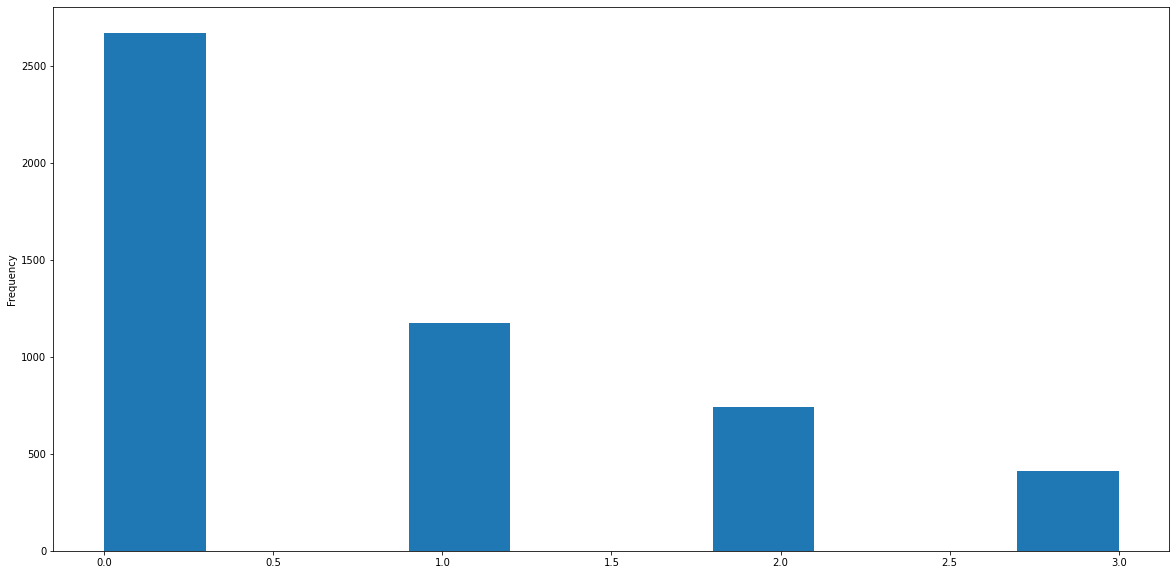

In [100]:
users_actions = df.groupby('user_id').event.value_counts().unstack().fillna(0)
users_actions['purchase'].plot.hist()

In [101]:
sum(users_actions.purchase > 0) *100 / N_USER

46.62

### Prices

In [185]:
df.price.hist(bins=100)

50      49
51      55
52      55
53      53
54      62
        ..
996     15
997     16
998     25
999     25
1000    34
Name: price, Length: 951, dtype: int64

### Size

- Distribution of the sizes

<AxesSubplot:>

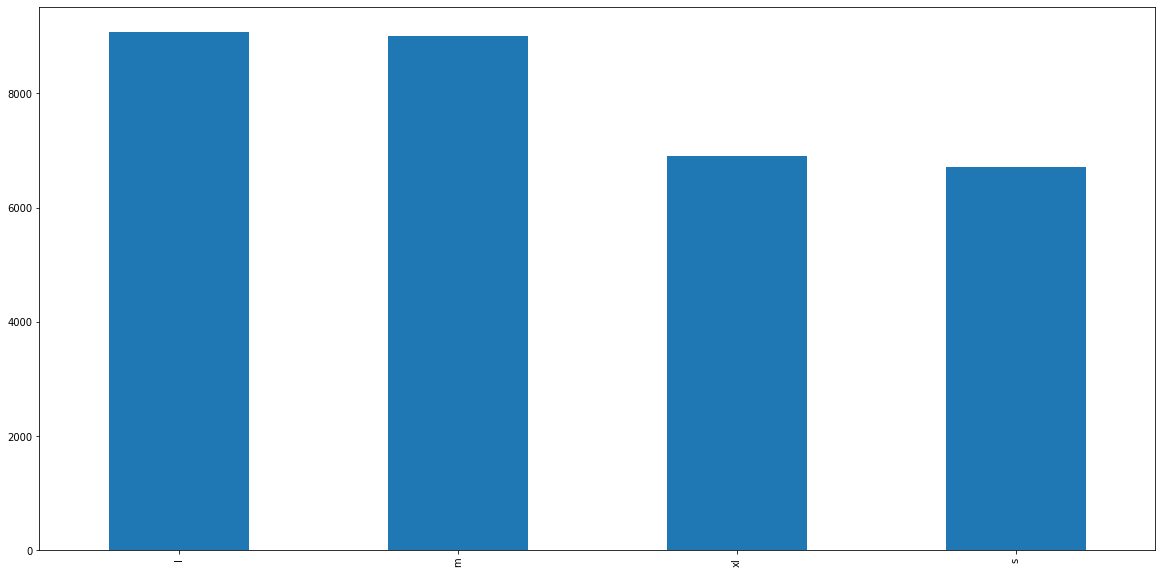

In [192]:
df['size'].value_counts().plot.bar()

- Proportion of sessions with the same size value

In [162]:
same_size_session_df = df.groupby(['user_id', 'session_id']).first()
sum(same_size_session_df['mean_size'].isin(same_size_session_df['mode_size']))*100 / len(same_size_session_df)

71.92448233861145

 - Proportion of users with same size

In [ ]:
same_size_session_df = df.groupby(['user_id', 'session_id']).first()
sum(same_size_session_df['mean_size'].isin(same_size_session_df['mode_size']))*100 / len(same_size_session_df)

In [168]:
sum(df.groupby(['user_id']).size_int.nunique() == 1) * 100 / N_USER

59.18

<AxesSubplot:ylabel='Frequency'>

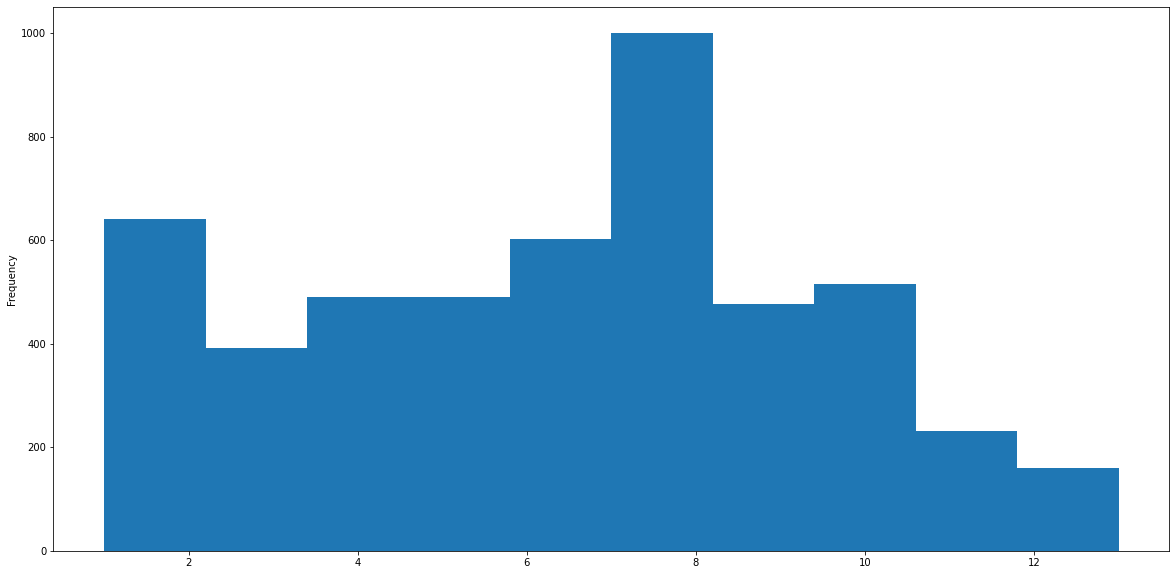

In [31]:
df.groupby('user_id').event.count().plot.hist()

<AxesSubplot:ylabel='Frequency'>

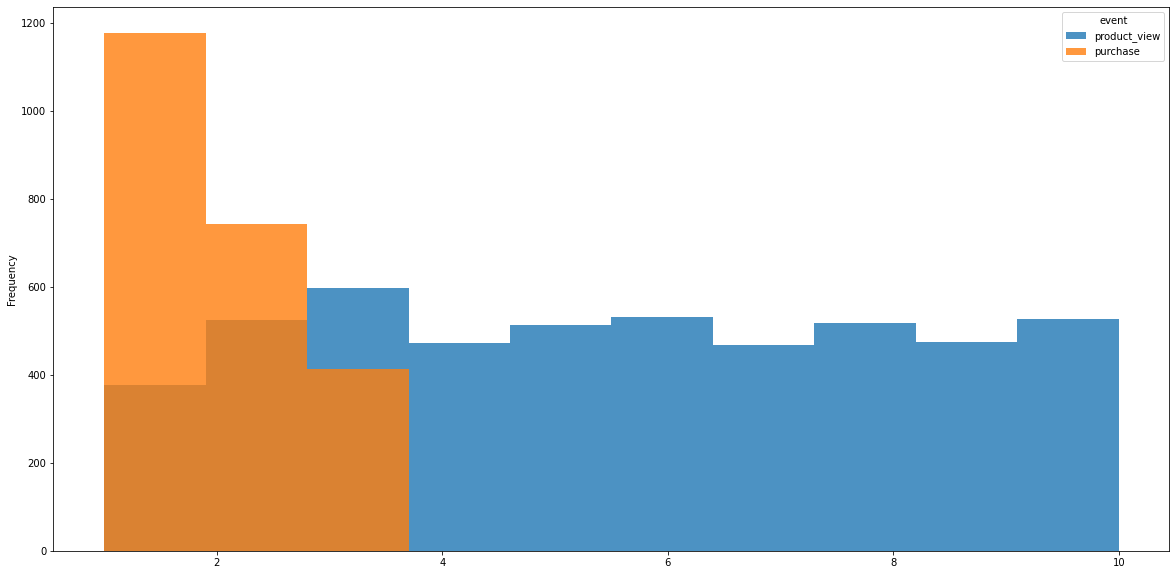

In [32]:
df.groupby(['user_id', 'event']).event.count().unstack().plot.hist(alpha=0.8)

<AxesSubplot:ylabel='Frequency'>

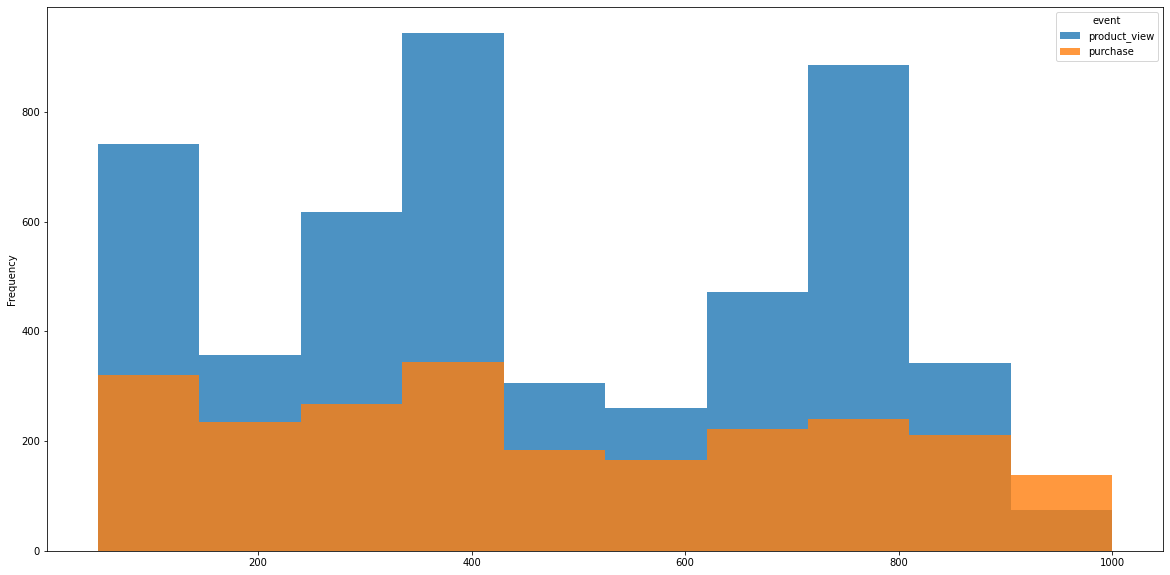

In [33]:
df.groupby(['user_id', 'event']).price.mean().unstack().plot.hist(alpha=0.8)

<AxesSubplot:xlabel='size_int', ylabel='price'>

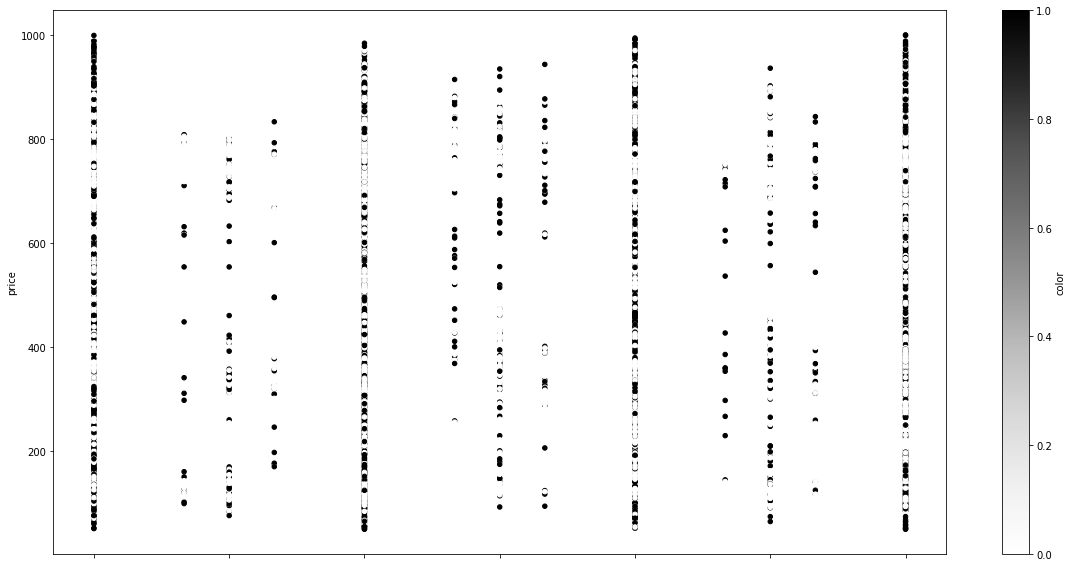

In [34]:
df['color'] = df.event.map({"purchase": 1, "product_view": 0})
df.groupby(['user_id', 'event']).mean().plot.scatter(x="size_int", y="price", c="color")

## Predictions

### Size

In [239]:
df.groupby('user_id').size_int.nunique().rename('n_unique_size').value_counts()

1    2959
2    1624
3     216
4     201
Name: n_unique_size, dtype: int64

In [365]:
def sample(n_actions, count_s, count_m, count_l, count_xl):
    sampling = []
    for i in [count_s, count_m, count_l, count_xl]:
        if i == n_actions:
            sampling.append(1)
        elif i == 0:
            sampling.append(0)
        else:
            sampling.append(np.random.beta(i, n_actions - i))
    return sampling

def get_proba(user_id, count_s, count_m, count_l, count_xl):
    n_actions = count_s + count_m + count_l + count_xl
    probas = [sample(n_actions, count_s, count_m, count_l, count_xl) for i in range(1000)]
    probas = (np.array(probas).sum(axis=0) / 1000).round(2)
                
    return {
        "user_id": user_id,
        "size_s": probas[0],
        "size_m": probas[1],
        "size_l": probas[2],
        "size_xl": probas[3],
    }

In [366]:
size_prediction_df = (
    df.groupby('user_id')['size']
      .value_counts()
      .unstack()
      .add_prefix('count_')
      .reset_index()
      .fillna(0)
      .apply(lambda x: get_proba(**x.to_dict()), axis=1)
      .apply(pd.Series)
      .set_index('user_id')
)
size_prediction_df

,size_s,size_m,size_l,size_xl
user_id,,,,
0003e353c219598fb1c1cd1a5c2873bbc64e2a973e594b4ce9346461f0f53705,0.00,0.00,0.00,1.00
00253fb09b8d40fe3594660db0bae6e2ad1907686f53789f1d18a8fa1f6da547,0.00,0.67,0.34,0.00
00265617b338e660f106406fbf5a8f28dc24296db6d82eb02680a5479601a14d,0.00,1.00,0.00,0.00
002a8623bc303ed3ff5034e28104af2b04e3af0e3902e4498a6406f1437c4ca0,0.49,0.49,0.00,0.00
005b8ccdb27416ecec480a05e0a0f72968546ad2edd2ff0c433d4c4b3456ad20,0.00,1.00,0.00,0.00
...,...,...,...,...
ffc4127b844adaeeddafa7697cf0fac68f521f1f25bf95e811da81602631b544,0.00,1.00,0.00,0.00
ffd02895b8cdb693f30b9f1911f99a7266d0be8020e9cb38c752d381eb144dd5,0.00,0.00,0.00,1.00
ffd32f4e58574db637754d4abc58ee93c5b98b98e31e3975d5a5c75f6349033c,0.00,0.00,0.00,1.00


In [220]:
df_example = df.query('user_id == "c444f4d096382a889e590974da7b4e3f4e4ff75e8c227718ecb7db0424017c3a"')
df_example

,user_id,event,price,size,size_int,session_id,has_order,mean_size,mean_price,mode_size,n_action
9224,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,618,m,2,0,True,2.7,739.7,3,10
9225,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,616,s,1,0,True,2.7,739.7,3,10
9226,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,958,xl,4,0,True,2.7,739.7,3,10
9227,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,709,m,2,0,True,2.7,739.7,3,10
9228,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,526,l,3,0,True,2.7,739.7,3,10
9229,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,665,xl,4,0,True,2.7,739.7,3,10
9230,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,838,m,2,0,True,2.7,739.7,3,10
9231,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,873,l,3,0,True,2.7,739.7,3,10
9232,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,product_view,797,l,3,0,True,2.7,739.7,3,10
9233,c444f4d096382a889e590974da7b4e3f4e4ff75e8c2277...,purchase,797,l,3,0,True,2.7,739.7,3,10


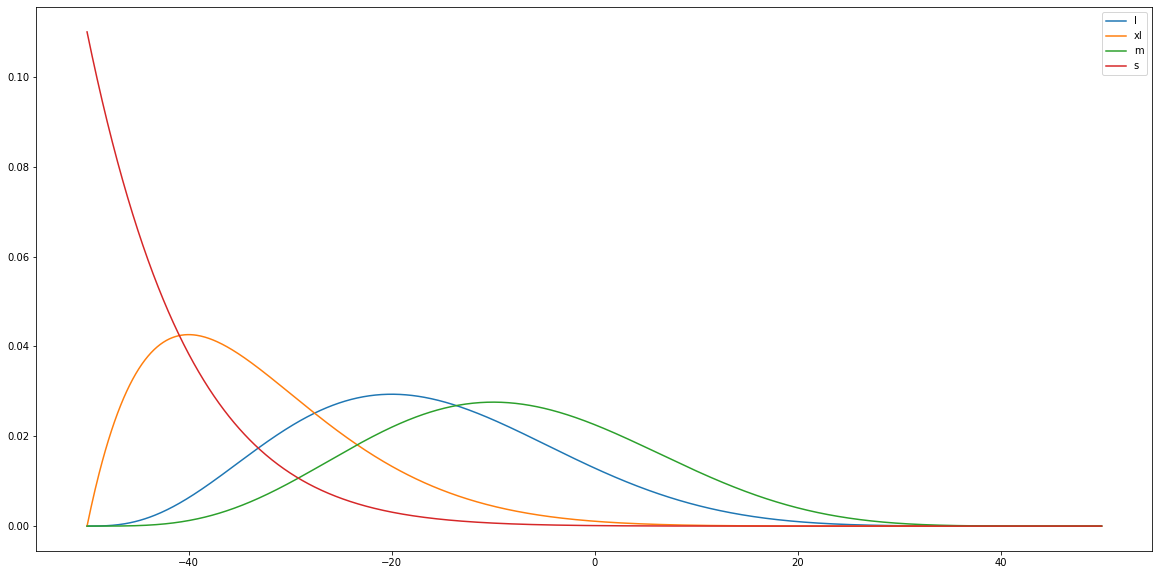

In [217]:
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np

for i in df["size"].unique():
    a = sum(df_example['size'] == i)
    b = len(df_example) - a
    x = np.arange (-50, 50, 0.1)
    y = beta.pdf(x,a,b, scale=100, loc=-50)
    plt.plot(x,y, label=i)
plt.legend()

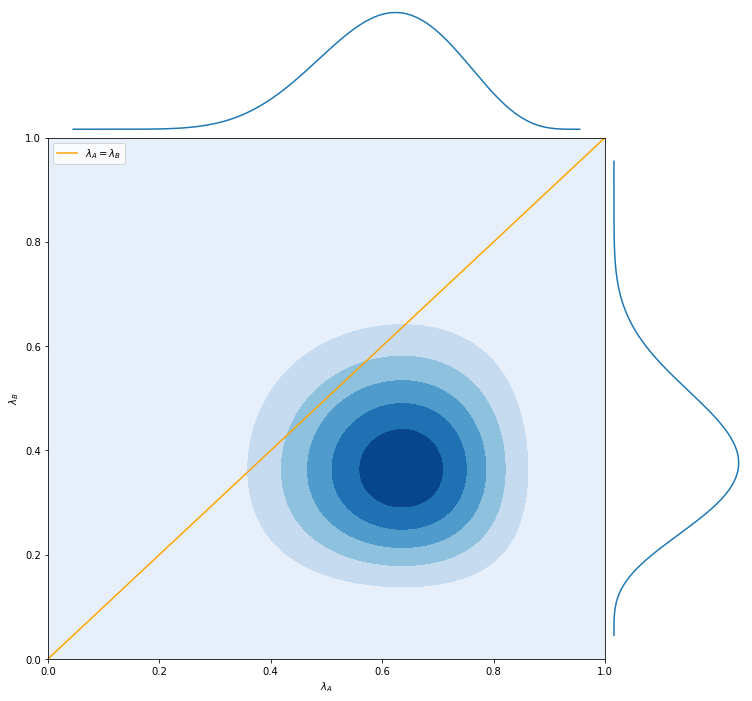

In [360]:
from scipy import stats

import matplotlib.gridspec as gridspec

N_plot = 1000
    
X = np.linspace(0, 1,N_plot)

posterior_a = stats.beta.pdf(X, 
                             8,
                             5)
posterior_b = stats.beta.pdf(X, 
                             5,
                             8)

A, B = np.meshgrid(posterior_a, posterior_b)

Z = A * B

f = plt.figure(figsize=(15,12))
gs0 = gridspec.GridSpec(5, 6, figure=f, wspace=.02, hspace=.02)
ax1 = f.add_subplot(gs0[1:, :-2])
ax2 = f.add_subplot(gs0[:1, :-2])
ax3 = f.add_subplot(gs0[1:, -2:-1])

ax1.contourf(X, X, Z, cmap= 'Blues')
ax1.plot(X, X, color = 'orange', label = '$\lambda_A = \lambda_B$')
ax2.plot(X, posterior_a)
ax3.plot(posterior_b, X)

ax1.set_xlabel('$\lambda_A$')
ax1.set_ylabel('$\lambda_B$')

ax3.set_axis_off()
ax2.set_axis_off()

ax1.legend()
plt.show()

### Price

- Simple bounds using mean and standart deviation

In [379]:
price_prediction_df = df.groupby('user_id')['price'].apply(lambda x: [np.mean(x) - np.std(x), np.mean(x) + np.std(x)]).apply(pd.Series).round()
price_prediction_df.columns = ["lower_bound", "upper_bound"]
price_prediction_df

,lower_bound,upper_bound
user_id,,
0003e353c219598fb1c1cd1a5c2873bbc64e2a973e594b4ce9346461f0f53705,322.0,465.0
00253fb09b8d40fe3594660db0bae6e2ad1907686f53789f1d18a8fa1f6da547,331.0,472.0
00265617b338e660f106406fbf5a8f28dc24296db6d82eb02680a5479601a14d,83.0,83.0
002a8623bc303ed3ff5034e28104af2b04e3af0e3902e4498a6406f1437c4ca0,96.0,110.0
005b8ccdb27416ecec480a05e0a0f72968546ad2edd2ff0c433d4c4b3456ad20,647.0,954.0
...,...,...
ffc4127b844adaeeddafa7697cf0fac68f521f1f25bf95e811da81602631b544,462.0,462.0
ffd02895b8cdb693f30b9f1911f99a7266d0be8020e9cb38c752d381eb144dd5,672.0,867.0
ffd32f4e58574db637754d4abc58ee93c5b98b98e31e3975d5a5c75f6349033c,533.0,881.0


In [380]:
df.groupby('user_id')['price'].count().sort_values()

user_id
2842e362a783727e56c4547f952cd5f7b4e807c41fa0dcb4822afd9fd35d29f3     1
55df2d7ff2f4436c1e60ae3adc9359ae8655612270680a84e7a2c7903884a2d7     1
883e7483b9c8b16900e30a9f0e7639d09ac84bf53567f8e6878d327e7eca8432     1
88716ae4e118538bbb7cc89e3ee1e4c63b3fe89ce0333bb912a6ca9012e89d36     1
f6c6c35592320268951526a57ddef21b4a5f59799bdffdd5d6ce00f8a13e792e     1
                                                                    ..
effabf5eae4c1b48f401aae0436fd6adedbe6c4468adf17a359149d8796b5315    13
766459420fa9d5dd4f4ffd91953e82df2b7c9a545f271bf0d06a08ea210a248d    13
1d8e6f127c8fad957edb2c18a970b0c6eb16872421d7f57102884a36b8de926d    13
024f89c5d5bf77fdddfbdb006e5164b92f4a49adad3f1293cb27a8d8818f5497    13
3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63590df5789e4a89991d    13
Name: price, Length: 5000, dtype: int64

In [385]:
example = df.query('user_id == "3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63590df5789e4a89991d"')
example

,user_id,event,price,size,size_int,session_id,has_order,mean_size,mean_price,mode_size,n_action
31068,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,735,s,1,0,True,1.0,571.777778,1,9
31069,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,770,s,1,0,True,1.0,571.777778,1,9
31070,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,685,s,1,0,True,1.0,571.777778,1,9
31071,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,970,s,1,0,True,1.0,571.777778,1,9
31072,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,76,s,1,0,True,1.0,571.777778,1,9
31073,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,839,s,1,0,True,1.0,571.777778,1,9
31074,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,833,s,1,0,True,1.0,571.777778,1,9
31075,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,119,s,1,0,True,1.0,571.777778,1,9
31076,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,purchase,119,s,1,0,True,1.0,571.777778,1,9
31077,3d77e33d2c26544104d23a7536c88b02b2e0faf4df2b63...,product_view,627,s,1,1,True,1.0,627.000000,1,2


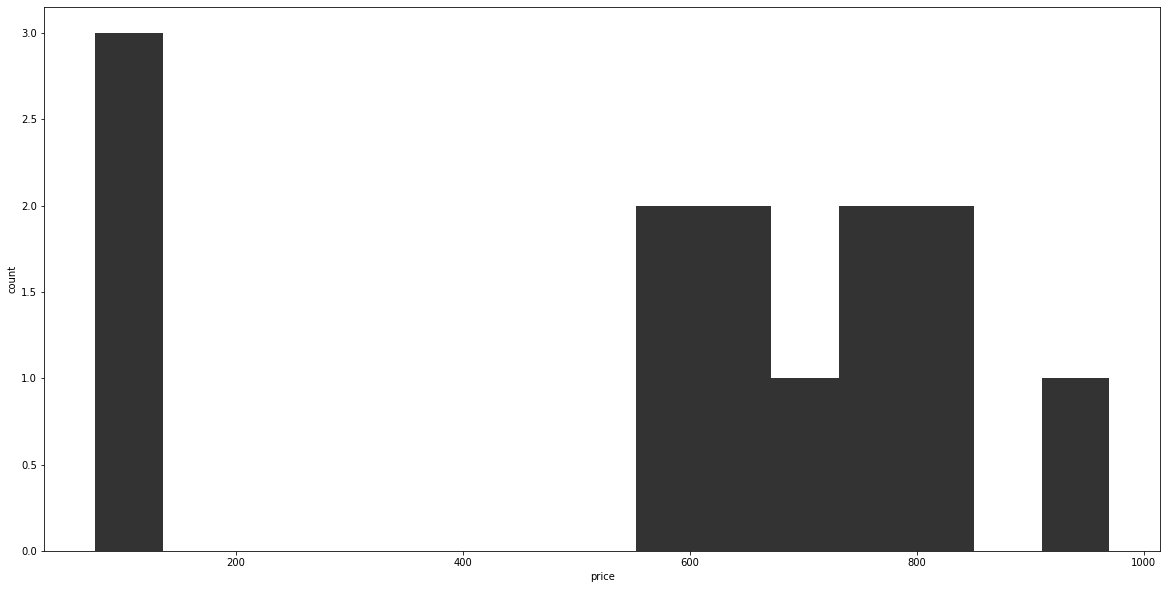

In [436]:
data = example.price.values
plt.hist(data, bins=15, color='black', alpha=.8)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

In [412]:
np.mean(data), np.var(data)

(580.4615384615385, 79839.32544378698)

In [449]:
def gaussian(m, v, x):
    out = (1 / np.sqrt(2*np.pi*v)) * np.exp(-(x - m)**2 / (2*v))
    return out

def gaussian_f(m, v, x):
    out = np.zeros(x.shape)
    for i,xx in enumerate(x):
        out[i] = gaussian(m, v, xx)
    return out

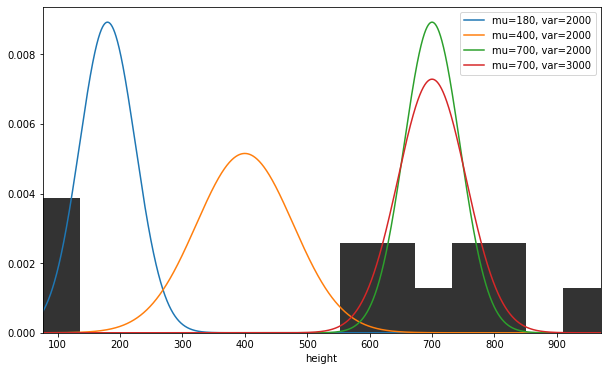

In [450]:
x = np.arange(data.min(), data.max(), 0.01)

plt.figure(figsize=(10,6))
plt.hist(data, bins=15, density=True, color='black',alpha=0.8)
plt.plot(x, gaussian_f(180, 2000, x), label='mu=180, var=2000')
plt.plot(x, gaussian_f(400, 6000, x), label='mu=400, var=2000')
plt.plot(x, gaussian_f(700, 2000, x), label='mu=700, var=2000')
plt.plot(x, gaussian_f(700, 3000, x), label='mu=700, var=3000')
plt.xlim([data.min(), data.max()])
plt.xlabel('height')
plt.legend()
plt.show()

In [455]:
x[gaussian_f(180, 2000, x).argmax()]

180.0000000000532

In [440]:
# Calculation of likelihood function
mus = np.arange(data.min(), data.max(), data.max()//100)
var_s = np.arange(np.var(data)/2, np.var(data)*2, np.var(data)//100)

In [441]:
params = np.zeros((len(mus), len(var_s)))
for i,m in enumerate(mus):
    for j,v in enumerate(var_s):
        p = 1
        for x in data:
            p *= gaussian(m, v, x)
        params[i,j] = p

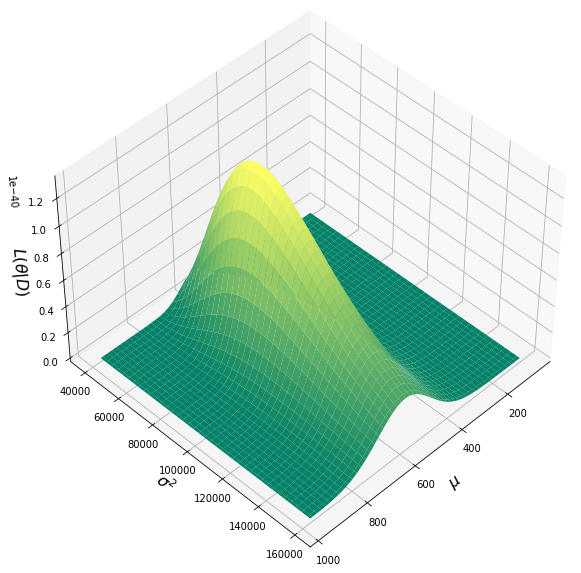

In [442]:
# plot likelihood

X,Y = np.meshgrid(var_s, mus)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Y, X, params, cmap='summer')
ax.view_init(azim=45, elev=45)
ax.set_xlabel(r'$\mu$', fontsize=16)
ax.set_ylabel(r'$\sigma^2$', fontsize=16)
ax.set_zlabel(r'$L(\theta|D)$', fontsize=16)
plt.show()

In [469]:
Y[np.unravel_index(params.argmax(), params.shape)]

580